<a href="https://colab.research.google.com/github/Kavyansh-Bagdi/Machine-Learning-Test-Projects/blob/main/Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:

def find_closest_centroid(X,centroids):
    centroids = np.array(centroids)
    idx = np.zeros(X.shape[0],dtype=int)
    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            distance.append(np.linalg.norm(X[i] - centroids[j])**2)
        idx[i] = np.argmin(distance)
    return idx


In [3]:

def compute_centroid(X,idx,K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        points = X[idx == k]
        centroids[k] = (np.mean(points,axis = 0))
    return centroids


In [4]:

def run_kmeans(init_centroids,X,max_itr=10):
    K = np.array(init_centroids).shape[0]
    centroids = init_centroids
    idx = np.zeros(X.shape[0],dtype=int)
    for i in range(max_itr):
        idx = find_closest_centroid(X,centroids)
        centroids = compute_centroid(X,idx,K)
    return [centroids,idx]


In [5]:
img = plt.imread("/content/drive/MyDrive/image.jpg")
img_data = (img/255.0)
print("Image Dimenstion : (heigth, width, rgb) :",img.shape)
img_data = np.reshape(img_data,((img_data.shape[0] * img_data.shape[1]),3))

Image Dimenstion : (heigth, width, rgb) : (512, 512, 3)


In [6]:
def kMeans_init_centroids(X, K):
    centroids = []
    centroids.append(X[np.random.randint(X.shape[0]), :])
    for _ in range(1, K):
        dist = []

        for i in range(X.shape[0]):
            point = X[i, :]
            min_distance = sys.maxsize

            for centroid in centroids:
                temp = np.linalg.norm(point - centroid)
                min_distance = min(min_distance, temp)

            dist.append(min_distance)

        dist = np.array(dist)
        next_centroid = X[np.argmax(dist), :]
        centroids.append(next_centroid)

    return centroids

In [7]:
def convert(bit_depth,data):
  max_itr = 10
  return run_kmeans(kMeans_init_centroids(data, bit_depth),data,max_itr)

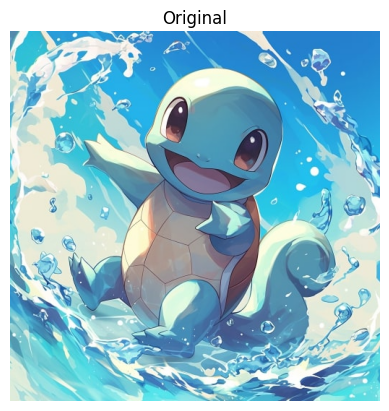

In [8]:
K_array = [2,4,8,16]

plt.imshow(img);
plt.title('Original');
plt.axis('off');


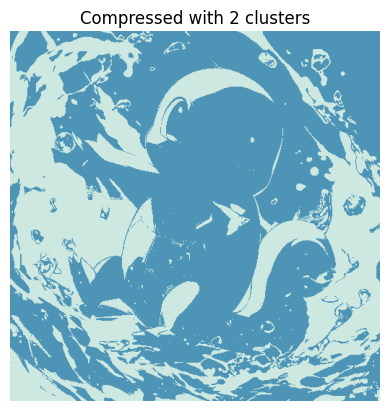

In [11]:
centroids , idx = convert(K_array[0],img_data)
X_recovered = centroids[idx, :]
X_recovered = np.reshape(X_recovered, img.shape)
plt.imshow(X_recovered);
plt.title(f"Compressed with {K_array[0]} clusters");
plt.axis('off');

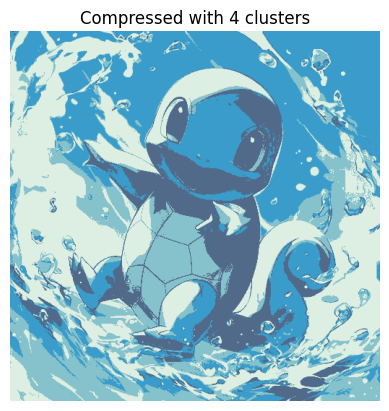

In [13]:
centroids , idx = convert(K_array[1],img_data)
X_recovered = centroids[idx, :]
X_recovered = np.reshape(X_recovered, img.shape)
plt.imshow(X_recovered);
plt.title(f"Compressed with {K_array[1]} clusters");
plt.axis('off');

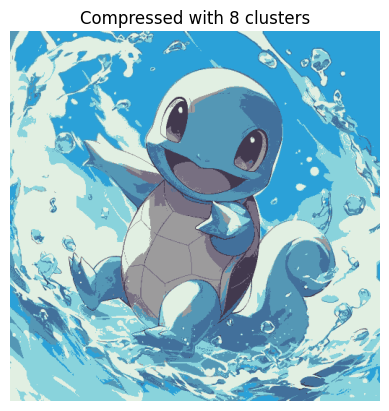

In [14]:
centroids , idx = convert(K_array[2],img_data)
X_recovered = centroids[idx, :]
X_recovered = np.reshape(X_recovered, img.shape)
plt.imshow(X_recovered);
plt.title(f"Compressed with {K_array[2]} clusters");
plt.axis('off');

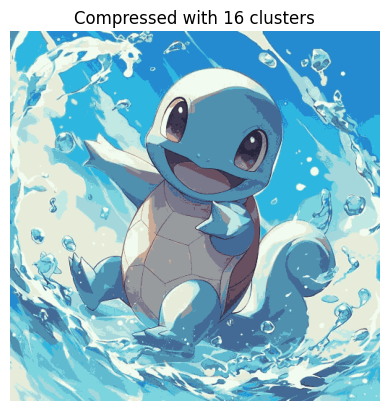

In [17]:
centroids , idx = convert(K_array[3],img_data)
X_recovered = centroids[idx, :]
X_recovered = np.reshape(X_recovered, img.shape)
plt.imshow(X_recovered);
plt.title(f"Compressed with {K_array[3]} clusters");
plt.axis('off');